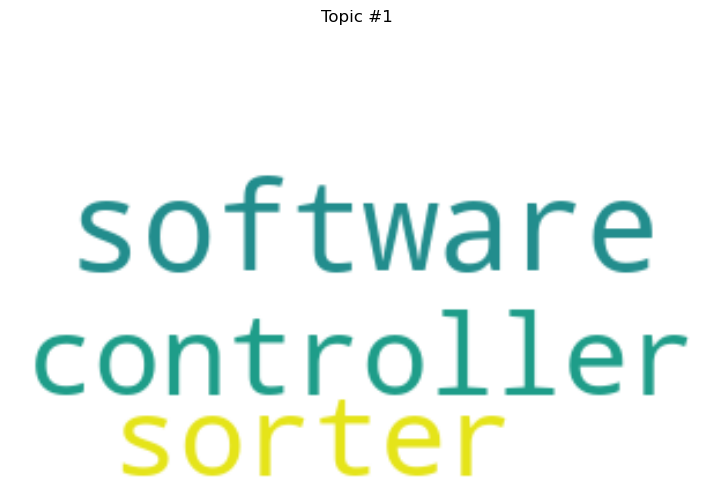

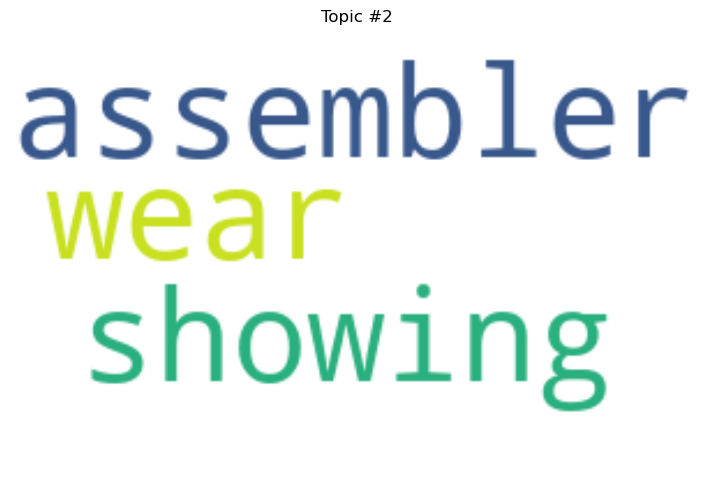

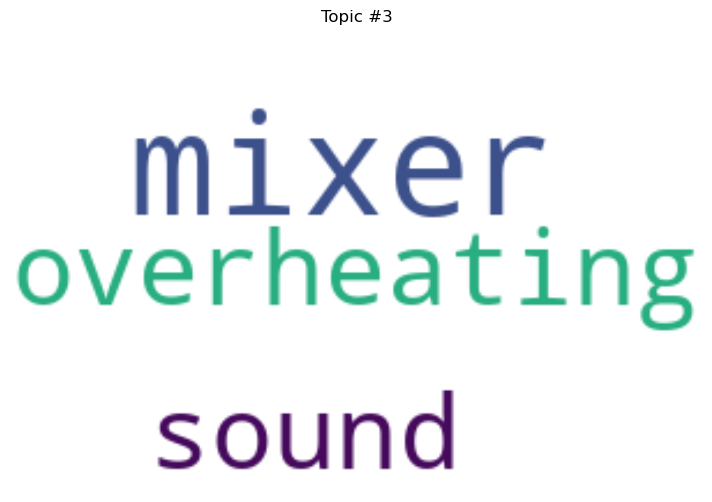

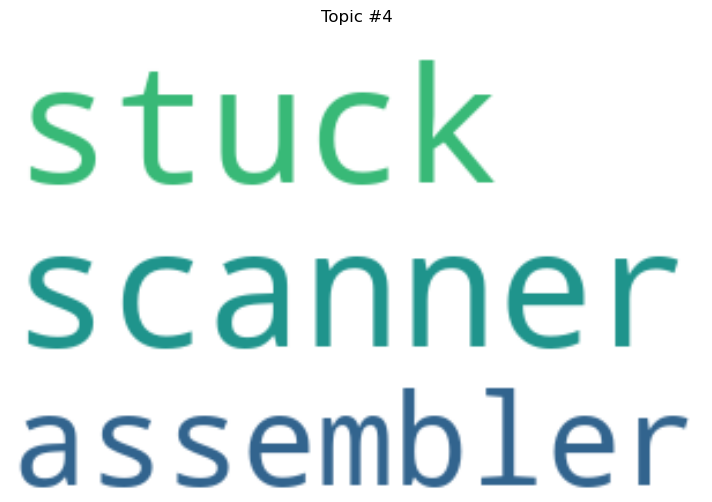

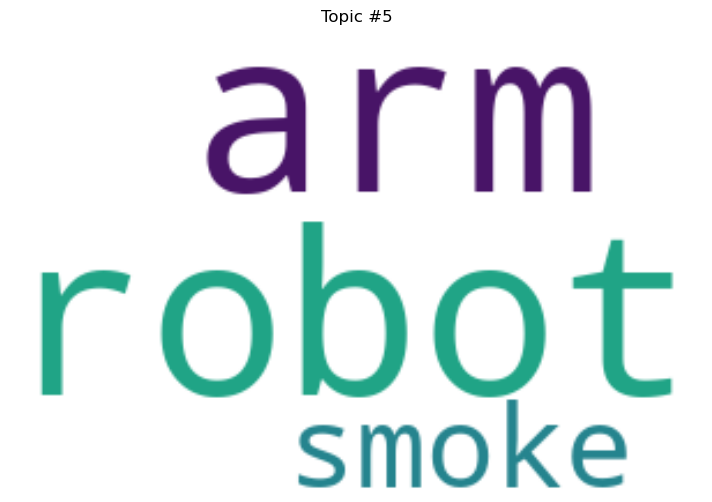

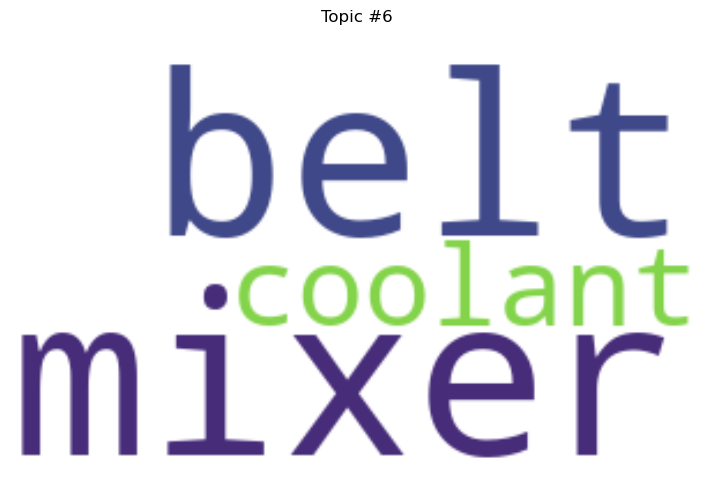

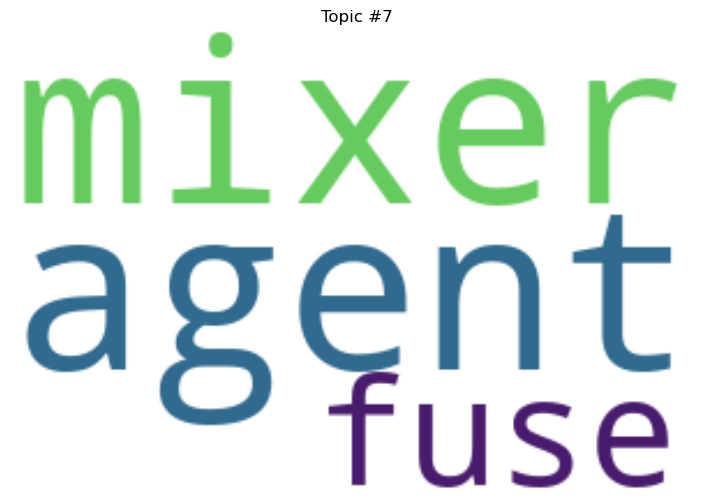

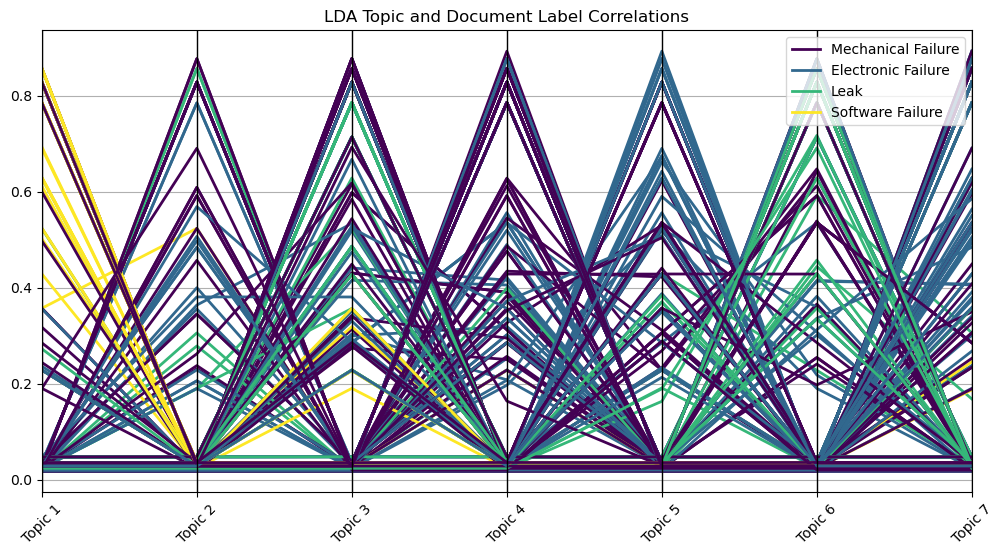

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from pandas.plotting import parallel_coordinates

# Veriyi oku
data = pd.read_csv("factoryReports.csv")
#print(data.head())

# Metin verilerini al
textData = data["Description"].astype(str)
#print(textData.head(10))

# Etiketleri al
labels = data["Category"]

# Metin verilerini ön işleme fonksiyonunu tanımla
def preprocessText(textData):
    # Metni küçük harfe çevir
    cleanTextData = textData.str.lower()

    # Tokenize et
    vectorizer = CountVectorizer(stop_words="english")
    tokenized_documents = vectorizer.fit_transform(cleanTextData)

    return tokenized_documents, vectorizer  # vectorizer'ı da döndür

# Metin verilerini ön işle
documents, vectorizer = preprocessText(textData)

# LDA modelini oluştur
numTopics = 7
lda = LatentDirichletAllocation(n_components=numTopics, random_state=42)
lda.fit(documents)

# Kelime bulutlarını görselleştir
def plot_wordclouds(lda_model, feature_names, num_topics):
    for topic_idx, topic in enumerate(lda_model.components_):
        top_feature_idx = topic.argsort()[:-min(len(feature_names), 4):-1]
        top_words = [feature_names[i] for i in top_feature_idx]
        wordcloud = WordCloud(width=300, height=200, background_color='white').generate(' '.join(top_words))

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic #{topic_idx + 1}')
        plt.axis('off')
        plt.show()

# Kelime bulutlarını görselleştir
feature_names = vectorizer.get_feature_names_out()
plot_wordclouds(lda, feature_names, numTopics)

# LDA topic ve document label korelasyonlarını görselleştir
topic_mixtures = lda.transform(documents)
mean_topic_probabilities = pd.DataFrame(topic_mixtures, columns=[f"Topic {i}" for i in range(1, numTopics + 1)])
mean_topic_probabilities["Category"] = labels

fig, ax = plt.subplots(figsize=(12, 6))
parallel_coordinates(mean_topic_probabilities, class_column="Category", linewidth=2, ax=ax, colormap='viridis')
plt.xticks(rotation=45)
plt.title("LDA Topic and Document Label Correlations")
plt.show()
